2015-10-09
    modified for py3

In [1]:
%matplotlib inline
from matplotlib.pyplot import *

In [2]:
from hambiplots.smithplot import *

In [3]:
import hambiplots.smithplot as sp

from hambiplots.smithplot.utils import parseCSV

In [4]:
import sys
from multiprocessing import pool
sys.path.append("..")
sys.path.append("./example")

import matplotlib.pyplot as pp
import numpy as np
import os
import shutil
#import smithplot
import time

from hambiplots.smithplot.smithaxes import update_scParams
from matplotlib.transforms import Affine2D
from multiprocessing.pool import Pool
from types import FunctionType



# default params
update_scParams({"init.updaterc": True,
                "plot.hacklines": False,
                "plot.rotatemarker": False,
                "grid.major.fancy": False,
                "grid.minor.fancy": False,
                "grid.minor.xauto": 3,
                "grid.minor.yauto": 3,
                "axes.norm": None,
                "axes.ylabel.correction": (-2, 0)})

In [5]:
build_all = True
build_path = "./build/"

In [6]:
# sample data
data = parseCSV("smithexample/data/s11", startRow=1, steps=10)
s11 = data[:, 1] + data[:, 2] * 1j

data = parseCSV("smithexample/data/s22", startRow=1, steps=10)
s22 = data[:, 1] + data[:, 2] * 1j

line = np.array([0.4 + 0.7j, 0.4 + 1.8j, 2 + 1j, 2])

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1718: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


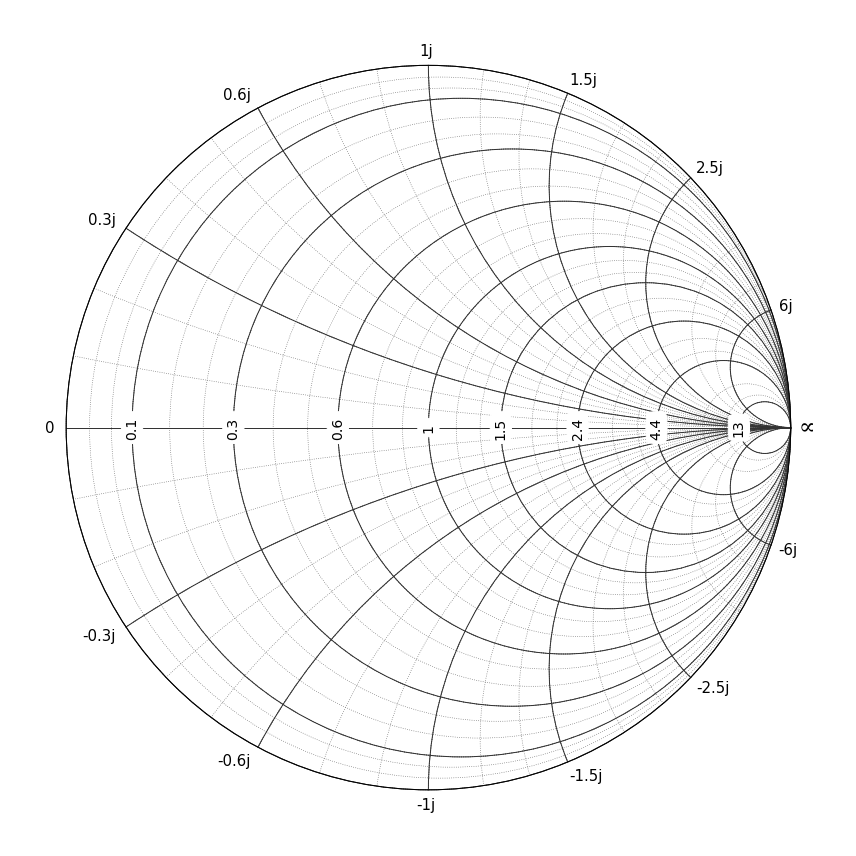

In [13]:
resize = 0.75
fig = figure(figsize=(resize*24, resize*16))
fig.set_tight_layout(True)
subplot(111, projection="smith")

savefig("ex_grid.svg", format = "svg")

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1718: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


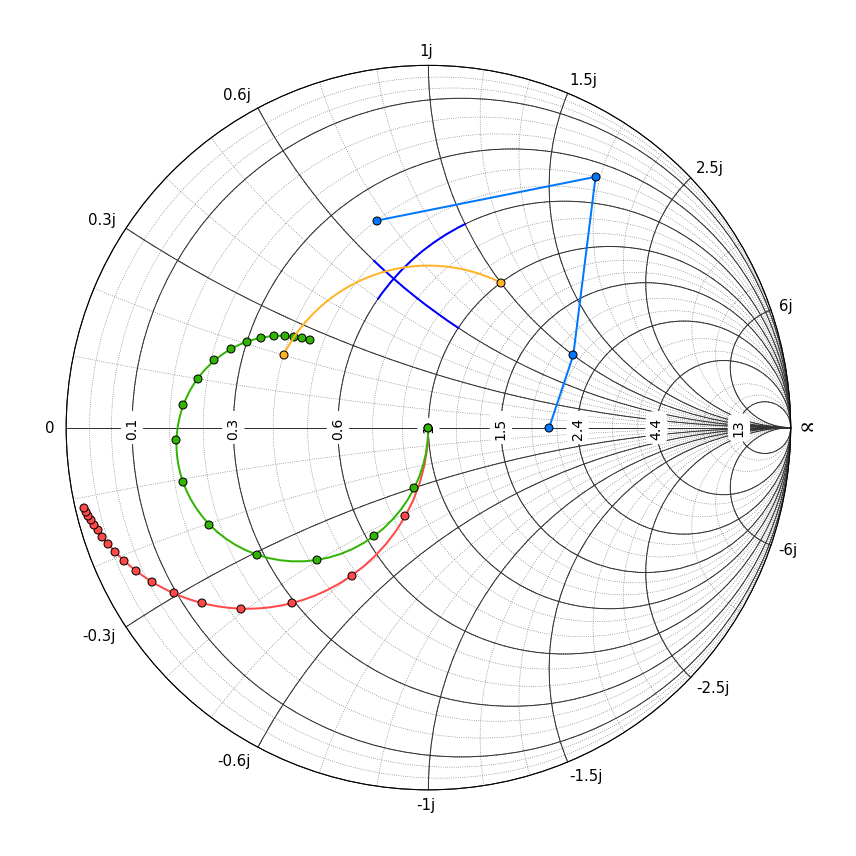

In [15]:
resize = 0.75
fig = figure(figsize=(resize*24, resize*16))
fig.set_tight_layout(True)
subplot(111, projection="smith")
plot(s11,  s22, markevery=5)
plot(line)
#plot_example()
gca().plot_vswr_circle(1 + 1j, lambda_rotation = 0.125, direction='ccw')
gca().add_imagarc(0.6, 1.0, 0.5)
gca().add_realarc(0.6, 1.0, 0.5)
savefig("ex_grid.pdf", format="pdf")

#Bachelor

In [9]:
initial = np.array([(14+1j*6.5)/50.])

expected_perfect = np.array([(14+1j*6.5)/50.,
                     0.31+1j*1.13,
                     1.37+1j*2.08, 
                     1.0+1j*0])

expected = np.array([0.29+1j*0.18,
                     0.31+1j*0.34,
                     0.31+1j*1.13,
                     1.37+1j*2.08, 
                     1.06+1j*0.05])

measured = np.array([0.29+1j*0.18, 
                     0.31+1j*0.34,
                     0.37+1j*1.23,
                     1.06+1j*1.72,
                     #0.75+1j*0.08,
                     0.99+1j*0.15])

In [10]:
abs((initial-1)/(initial+1))

array([ 0.56866993])

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1718: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


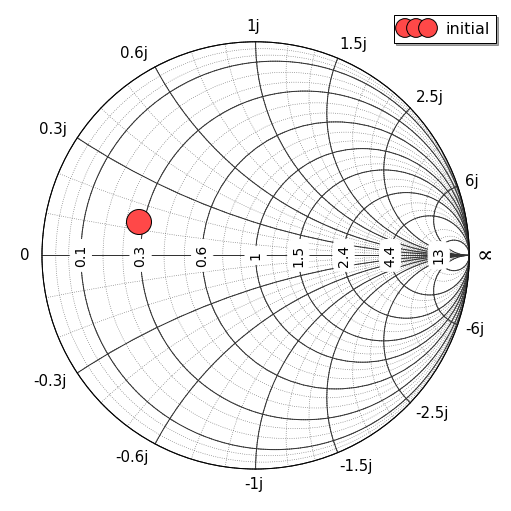

In [11]:
resize = 0.45
fig = figure(figsize=(resize*24, resize*16))
fig.set_tight_layout(True)
subplot(111, projection="smith")
plot(initial, 'o', markersize = 25,label='initial') #o', markersize=20,
#plot(measured, markersize=20)
legend()
savefig("ex_init.pdf", format="pdf")

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1718: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


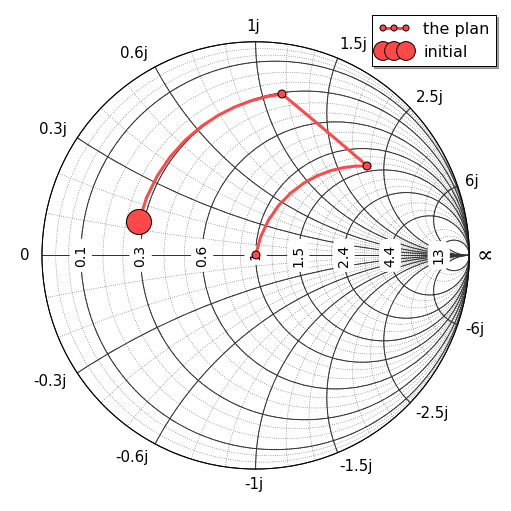

In [12]:
resize = 0.45
fig = figure(figsize=(resize*24, resize*16))
fig.set_tight_layout(True)
subplot(111, projection="smith")
base_line, = plot(expected_perfect,path_interpolation=10, lw=3, label='the plan')
plot(initial, 'o', color = base_line.get_color(), markersize = 25, label='initial') #o', markersize=20,

#plot(measured, markersize=20)
legend()
savefig("ex_exp_perf.pdf", format="pdf")

In [ ]:
resize = 0.45
fig = figure(figsize=(resize*24, resize*16))
fig.set_tight_layout(True)
subplot(111, projection="smith")
plot(expected, path_interpolation=10, lw=3, label='expected') #o', markersize=20,
#plot(measured, markersize=20)
legend()
savefig("ex_exp.pdf", format="pdf")

In [ ]:
measured

In [ ]:
measured[0:]

In [ ]:
resize = 0.45
from numpy import arange

for i in arange(0, len(measured)):
    print(i)
    fig = figure(figsize=(resize*24, resize*16))
    fig.set_tight_layout(True)
    subplot(111, projection="smith")
    plot(expected, path_interpolation=10, lw=3, label='expected') #o', markersize=20,
    if i == 0:
        plot(measured[0:], path_interpolation=10, markersize=20, label='measured')
    else:
        plot(measured[0:-i], path_interpolation=10, markersize=20, label='measured')
    legend()
    savefig("ex_meas_exp_"+str(i)+".png", format="png")